In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [5]:
df= pd.read_csv("C:/Users/VINAY KUMAR PATEL/Downloads/machine learning/assingment 4/diabetes.csv",header=0)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


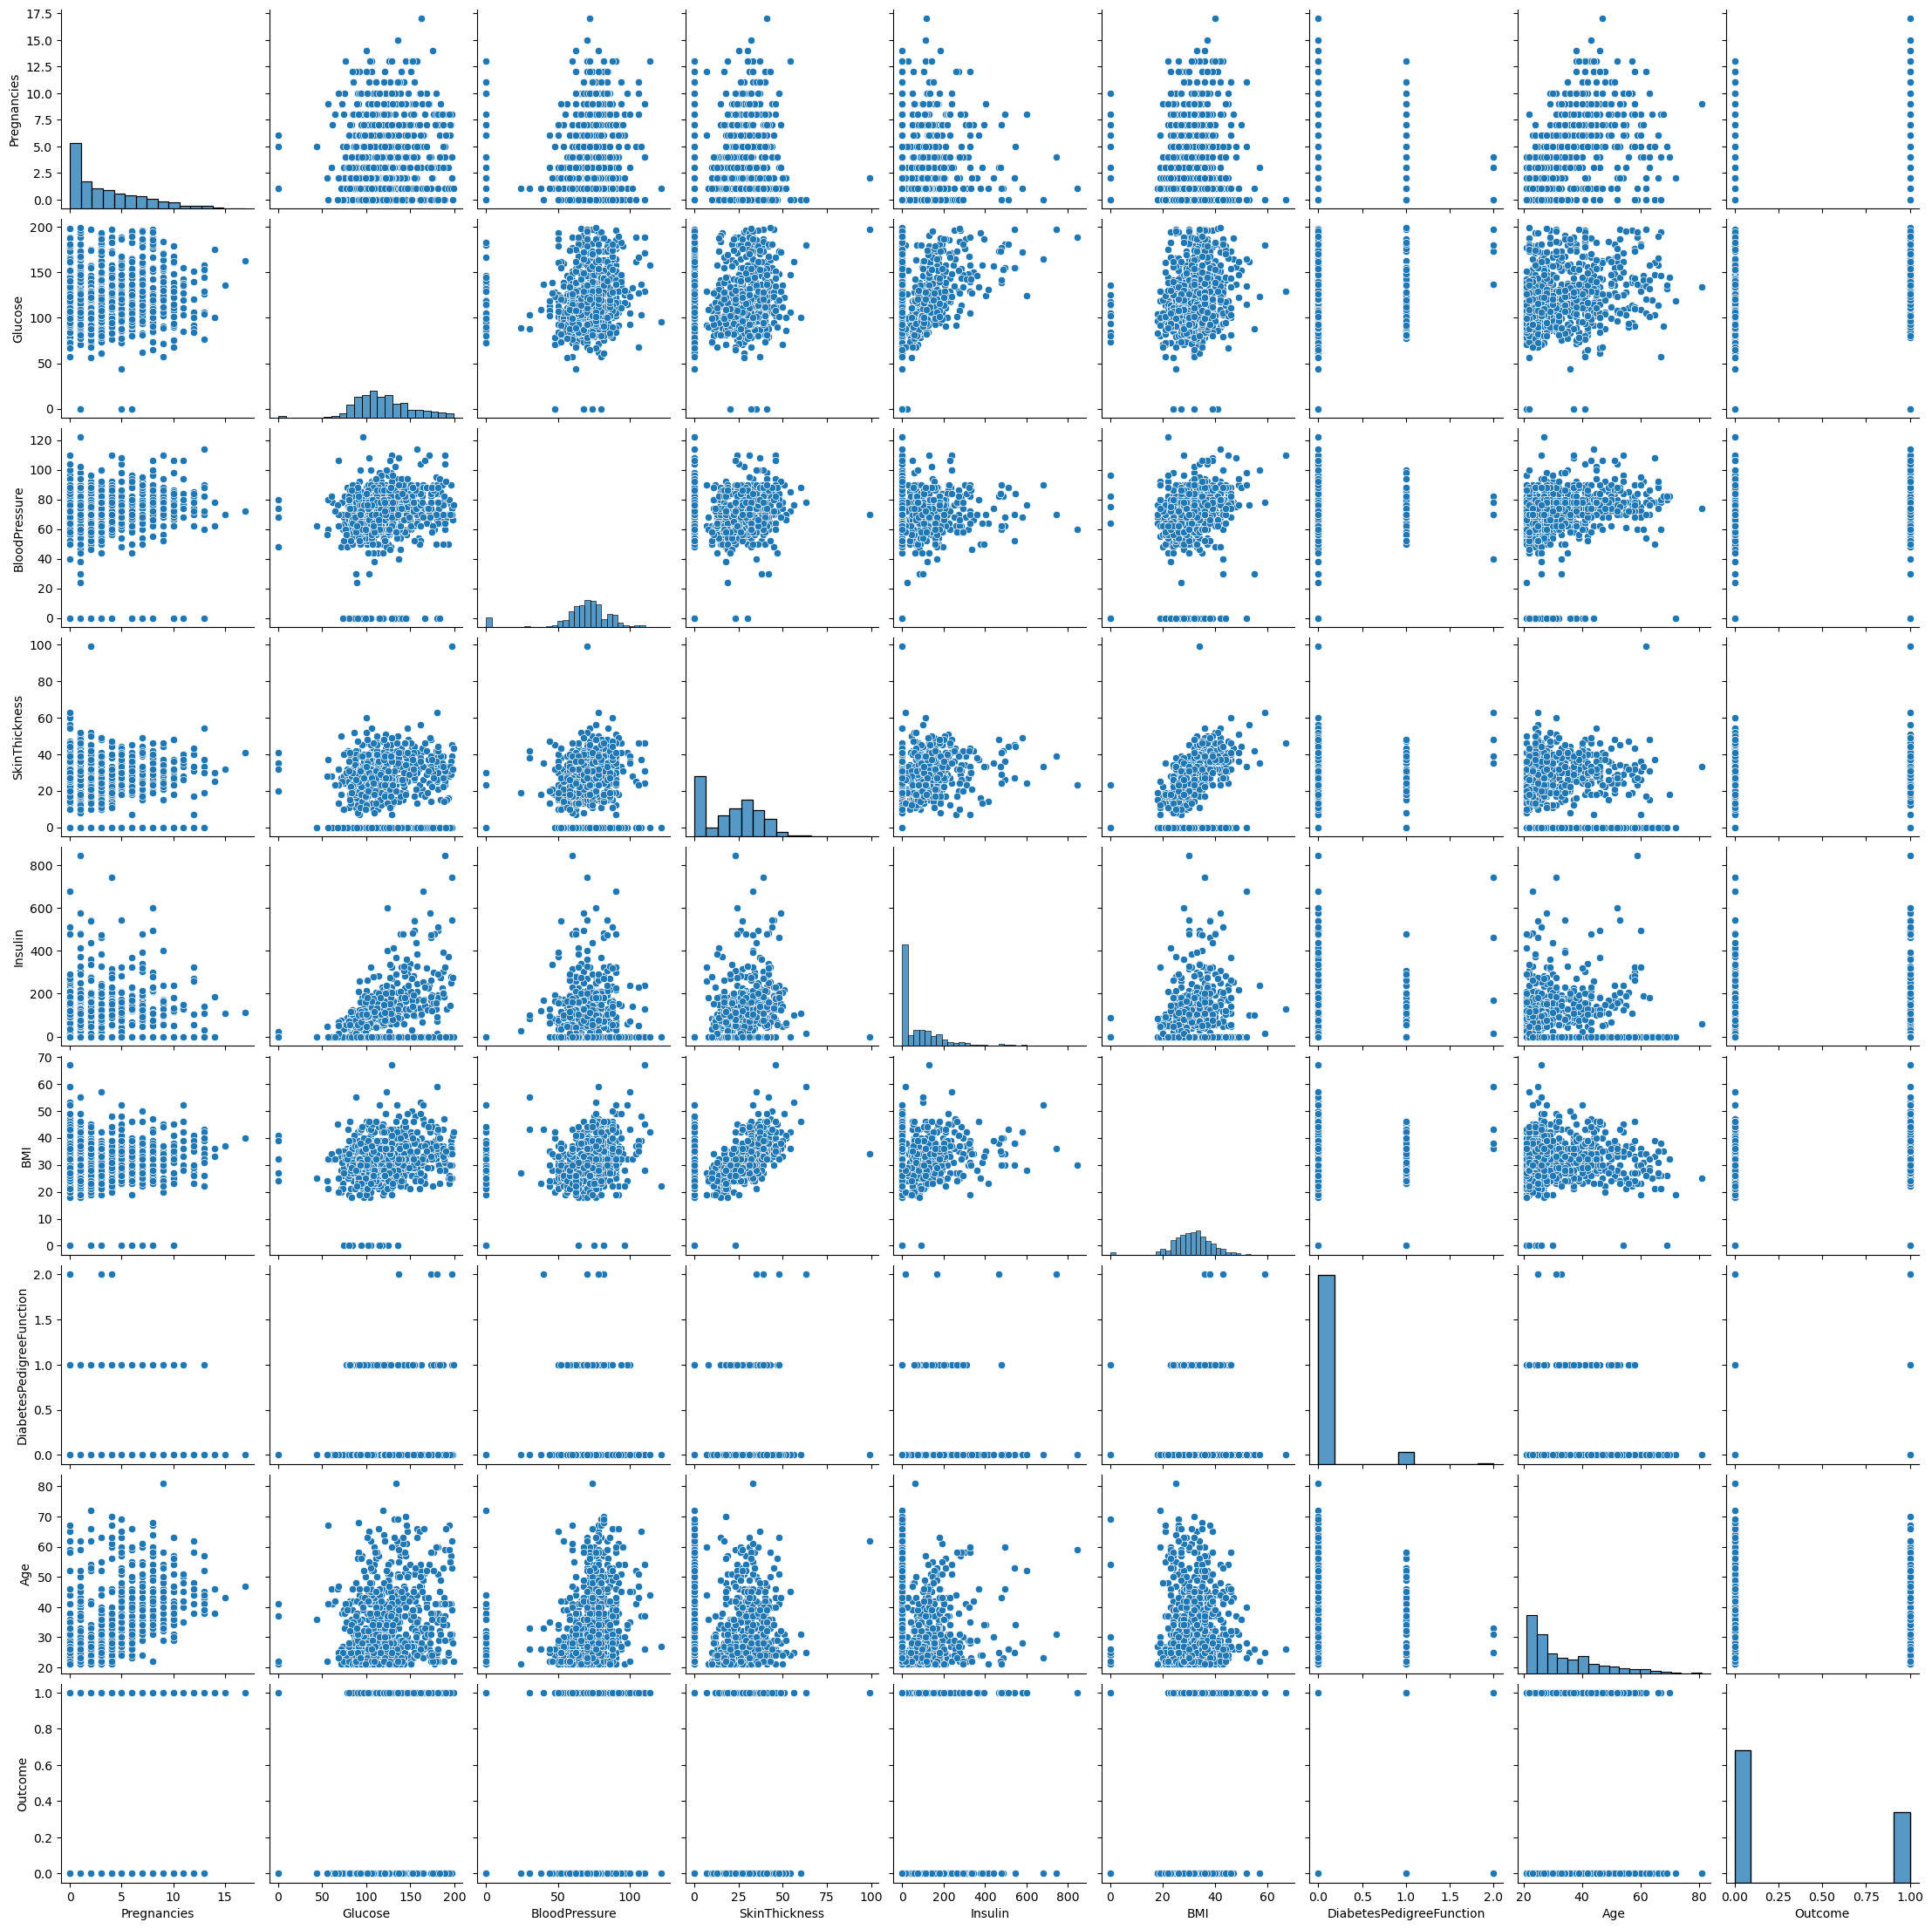

In [113]:
sns.pairplot(data=df)

In [13]:
df=pd.get_dummies(df).astype(int)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33,0,50,1
1,1,85,66,29,0,26,0,31,0
2,8,183,64,0,0,23,0,32,1
3,1,89,66,23,94,28,0,21,0
4,0,137,40,35,168,43,2,33,1


In [17]:
x=df[['Glucose']]

In [19]:
y=df['Outcome']

In [21]:
x.head()


,Glucose
0,148
1,85
2,183
3,89
4,137


In [23]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int32

In [25]:
from sklearn.linear_model import LogisticRegression

In [27]:
cls=LogisticRegression()

In [29]:
cls.fit(x,y)

LogisticRegression()

In [31]:
cls.coef_

array([[0.03787169]])

In [33]:
cls.intercept_

array([-5.34990586])

In [35]:
from sklearn.model_selection import train_test_split

In [42]:
x_multi = df.drop(columns='Outcome')
y_multi = df['Outcome']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=0)

In [46]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [48]:
cls2 = LogisticRegression(max_iter=1000)

In [50]:
cls2.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [52]:
cls2.coef_

array([[ 0.08645038,  0.03370335, -0.01391421,  0.00576984, -0.00129209,
         0.08906079,  0.63264591,  0.02126751]])

In [54]:
cls2.intercept_

array([-7.83603183])

In [56]:
y_pred = cls2.predict(x_test)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [58]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,accuracy_score
#calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy_score_lr= accuracy_score(y_test, y_pred)

In [60]:
print (conf_matrix)
print(precision)
print(recall)
print(accuracy_score_lr)

[[97 10]
 [19 28]]
0.7368421052631579
0.5957446808510638
0.8116883116883117


In [62]:
#perform same by lda using train test data

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [66]:
clf_lda= LinearDiscriminantAnalysis()

In [68]:
clf_lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [70]:
y_pred_lda= clf_lda.predict(x_test)

In [72]:
print(y_pred_lda)

[1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [74]:
confusion_lda=confusion_matrix(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
accuracy_score_lda= accuracy_score(y_test, y_pred_lda)

In [76]:
print (confusion_lda)
print(precision_lda)
print(recall_lda)
print(accuracy_score_lda)


[[97 10]
 [19 28]]
0.7368421052631579
0.5957446808510638
0.8116883116883117


In [78]:
#perform same by lda using x and y

In [80]:
clf_lda_normal= LinearDiscriminantAnalysis()

In [82]:
clf_lda_normal.fit(x_multi,y_multi)

LinearDiscriminantAnalysis()

In [84]:
y_pred_normal_lda = clf_lda_normal.predict(x_multi)

In [86]:
confusion_matrix_normal=confusion_matrix(y_multi,y_pred_normal_lda)
precision_lda_n = precision_score(y_multi, y_pred_normal_lda)
recall_lda_n = recall_score(y_multi, y_pred_normal_lda)
print(confusion_matrix_normal)
print(precision_lda_n)
print(recall_lda_n)

[[441  59]
 [113 155]]
0.7242990654205608
0.5783582089552238


In [88]:
#perform same by KNN

In [90]:
from sklearn import preprocessing

In [92]:
scaler= preprocessing.StandardScaler().fit(x_train)

In [94]:
x_train_s=scaler.transform(x_train)

In [96]:
scaler= preprocessing.StandardScaler().fit(x_test)

In [98]:
x_test_s=scaler.transform(x_test)

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
clf_knn_3= KNeighborsClassifier(n_neighbors=3)

In [104]:
clf_knn_3.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=3)

In [106]:
y_pred_knn= clf_knn_3.predict(x_test_s)

In [108]:
confusion_knn= confusion_matrix(y_test,y_pred_knn)
print(confusion_knn)

[[88 19]
 [16 31]]


In [110]:
accuracy_score(y_test,y_pred_knn)

0.7727272727272727